In [1]:
import pandas as pd
import numpy as np
blods=pd.read_csv("data.csv")
columns=list(blods.columns[1:-1])
blods.head()

,ID,x,y,cluster
0,1,35.190,12.189,1
1,2,26.288,41.718,2
2,3,0.376,15.506,0
3,4,26.116,3.963,1
4,5,25.893,31.515,2


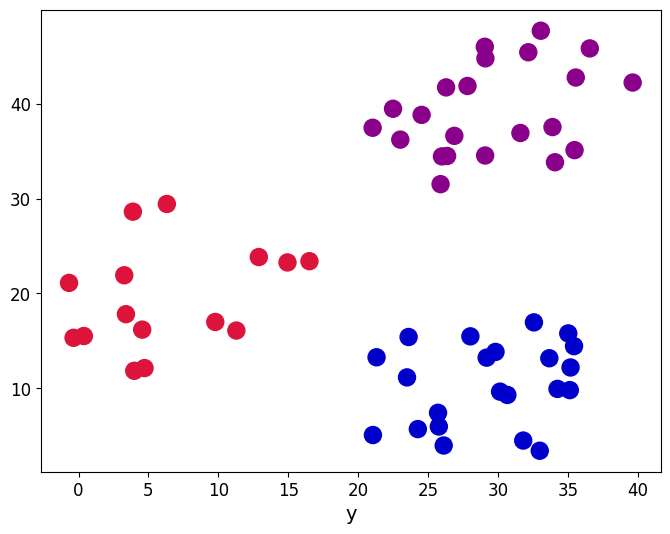

In [18]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

customcmap = ListedColormap(['crimson','mediumblue','darkmagenta'])
fig,ax = plt.subplots(figsize=(8,6))
plt.scatter(x=blods['x'],y=blods['y'],s=150,
           c=blods['cluster'].astype('category'),
           cmap=customcmap)
ax.set_xlabel(r'x',fontsize=14)
ax.set_xlabel(r'y',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [6]:
#Khởi tạo tâm và xác định k
def initiable_centroids(k,dset):
    centroids = dset.sample(k)
    return centroids
np.random.seed(42)
k=3
df=blods[['x','y']]
centroids = initiable_centroids(k,df)
centroids

,x,y
0,35.190,12.189
5,23.606,15.402
34,23.492,11.142


In [7]:
#tính khoảng cách
def rsserr(a,b):
    return np.square(np.sum((a-b)**2))

In [8]:
for i, centroid in enumerate(range(centroids.shape[0])):
    err = rsserr(centroids.iloc[centroid,:],df.iloc[36,:])
    print('Error for centroid {0}: {1:.2f}'.format(i,err))

Error for centroid 0: 389421.78
Error for centroid 1: 277312.92
Error for centroid 2: 532675.05


In [9]:
#gán giá trị các tâm

            
def centroid_assignation(dset, centroids):
    k = centroids.shape[0]
    n = dset.shape[0]
    assignation = []
    assign_errors = []
    for obs in range(n):
        all_errors = np.array([])
        for centroid in range(k):
            err = rsserr(centroids.iloc[centroid], dset.iloc[obs])
            all_errors = np.append(all_errors, err)
        nearest_centroid = np.argmin(all_errors)
        nearest_centroid_error = all_errors[nearest_centroid]
        assignation.append(nearest_centroid)
        assign_errors.append(nearest_centroid_error)
    return assignation, assign_errors           
       

In [10]:
df['centroid'],df['error']=centroid_assignation(df,centroids)
df.head()

C:\Users\DHPC\AppData\Local\Temp\ipykernel_16560\3248998631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['centroid'],df['error']=centroid_assignation(df,centroids)


,x,y,centroid,error
0,35.190,12.189,0,0.000000
1,26.288,41.718,1,489615.047636
2,0.376,15.506,1,291215.340218
3,26.116,3.963,2,3413.295654
4,25.893,31.515,1,70150.362982


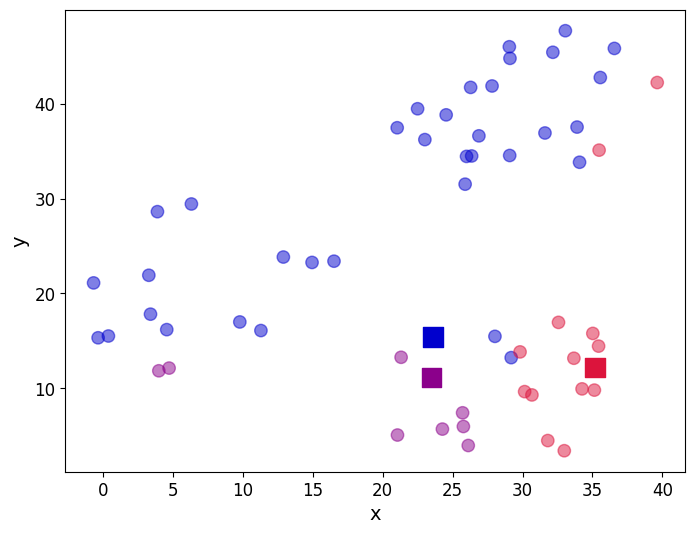

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], marker='o',
            c=df['centroid'].astype('category'),
            cmap=customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1],
            marker='s', c=[0,1,2],
            cmap=customcmap, s=200)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [13]:
print('The total error is {0:.2f}'.format(df['error'].sum()))

The total error is 13208263.23


In [22]:
colnames = ['x', 'y']
colidx = [df.columns.get_loc(c) for c in colnames]
centroids = df.groupby('centroid').median().iloc[:, colidx].reset_index(drop=True)
centroids

,x,y
0,25.9435,36.411
1,33.9885,43.770
2,24.2680,13.264


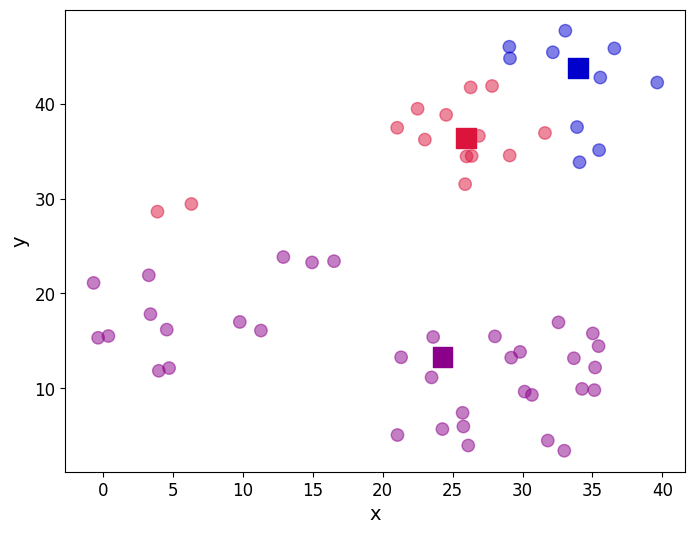

In [23]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], marker='o',
            c=df['centroid'].astype('category'),
            cmap=customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1],
            marker='s', c=[0,1,2],
            cmap=customcmap, s=200)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [24]:
def kmedian(dset,k=2,tol=1e-4):
    working_dset = dset.copy()
    err=[]
    goahead = True
    j=0
    centroids = initiable_centroids(k,dset)
    while(goahead):
        working_dset['centroid'],j_err = centroid_assignation(working_dset,centroids)
        err.append(sum(j_err))
        centroids = working_dset.groupby('centroid').median().reset_index(drop=True)
        if j>0:
            if err[j-1]-err[j]<=tol:
                goahead =False
        j+=1
    
    working_dset['centroid'],j_egg = centroid_assignation(working_dset,centroids)
    centroids = working_dset.groupby('centroid').median().reset_index(drop=True)
    return working_dset['centroid'], j_err, centroids

In [25]:
df['centroid'],df['error'],centroids=kmedian(df[['x','y']],3)
df.head()

,x,y,centroid,error
0,35.190,12.189,1,888.777539
1,26.288,41.718,0,410.436826
2,0.376,15.506,2,516.684359
3,26.116,3.963,1,3385.820331
4,25.893,31.515,0,2968.727738


In [23]:
centroids

,x,y
0,29.0685,38.1785
1,29.9860,10.5365
2,4.5500,17.8100


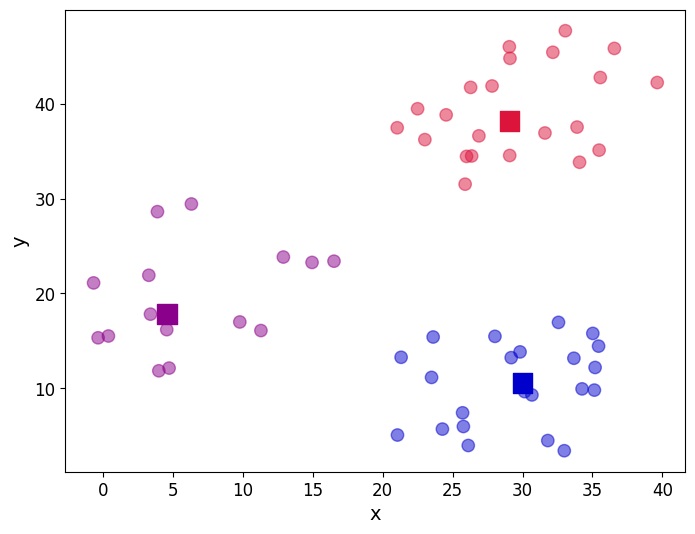

In [24]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], marker='o',
            c=df['centroid'].astype('category'),
            cmap=customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1],
            marker='s', c=[0,1,2],
            cmap=customcmap, s=200)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [25]:
err_total =[]
n=10
df_elbow = blods[['x','y']]
for i in range(n):
    _,my_errs,_ = kmeans(df_elbow,i+1)
    err_total.append(sum(my_errs))

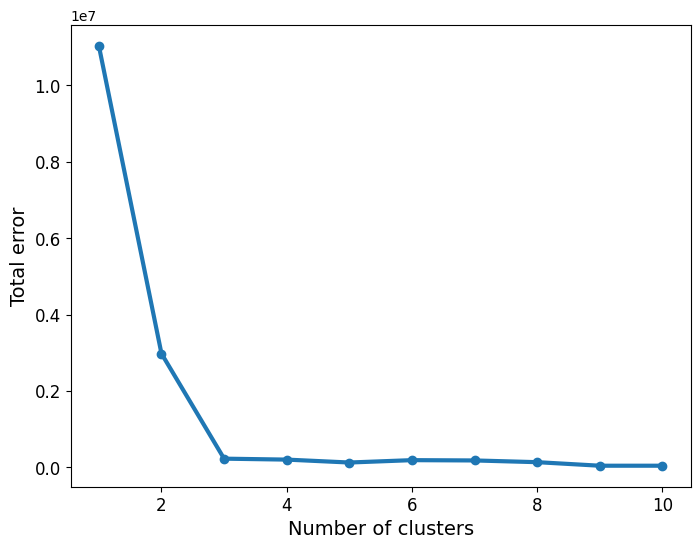

In [26]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,n+1),err_total,linewidth=3,marker='o')
ax.set_xlabel(r'Number of clusters', fontsize=14)
ax.set_ylabel(r'Total error', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()